# Project: Titanic Data Analysis

<a id='intro'></a>
## Introduction

In this project, we will be analyzing data associated with the tragic event of the sinking Titanic. In particular, we will find trends among the passengers who survived and how they differ from those who did not survive. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
# axis = 1 to let the function than we are using the column names
# inplace = True to keep those changes

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We can see that Age column has a lot of missing data

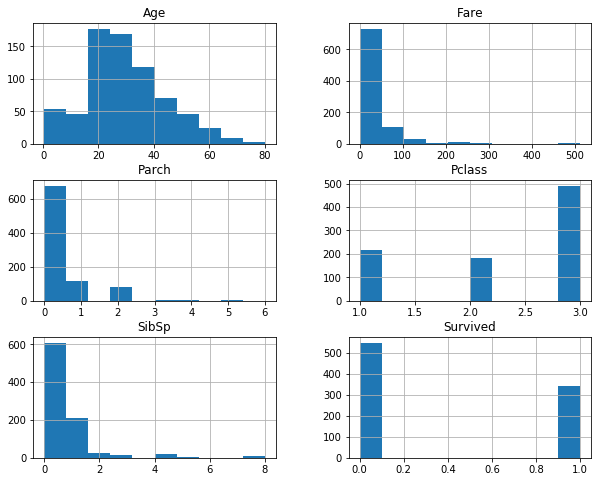

In [9]:
df.hist(figsize=(10,8));

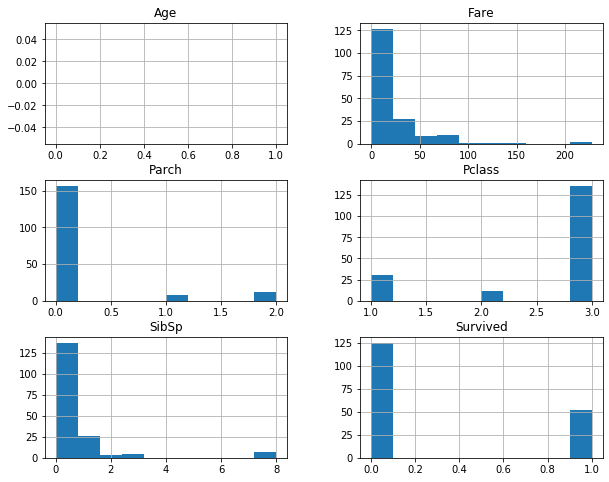

In [10]:
df[df.Age.isnull()].hist(figsize=(10,8));

In [11]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


Since the missing data is only in two rows we can delete it

In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [14]:
survived = df.Survived == True
died = df.Survived == False

In [15]:
df.Fare[survived].mean()

48.209498235294106

In [16]:
df.Fare[died].mean()

22.117886885245877

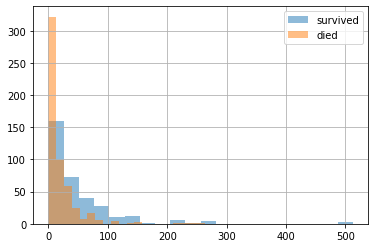

In [17]:
df.Fare[survived].hist(alpha=0.5, bins=20, label='survived')
df.Fare[died].hist(alpha=0.5, bins=20, label='died');
plt.legend();

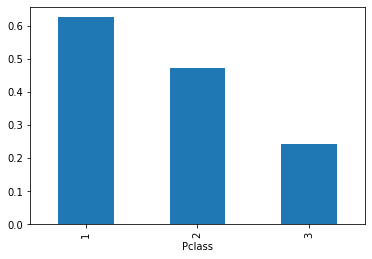

In [18]:
df.groupby('Pclass').Survived.mean().plot(kind='bar');

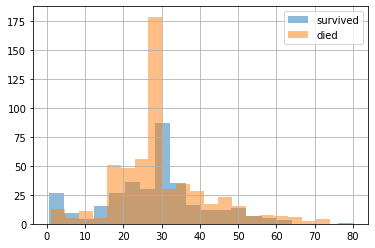

In [19]:
df.Age[survived].hist(alpha=0.5, bins=20, label='survived')
df.Age[died].hist(alpha=0.5, bins=20, label='died');
plt.legend();

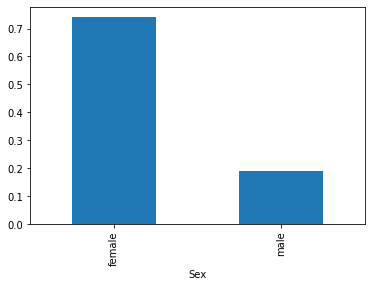

In [20]:
df.groupby('Sex').Survived.mean().plot(kind='bar');

In [21]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [22]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [23]:
df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')['Fare'].median()

(23.0, 10.5)

From the data, we can see that women were spending more

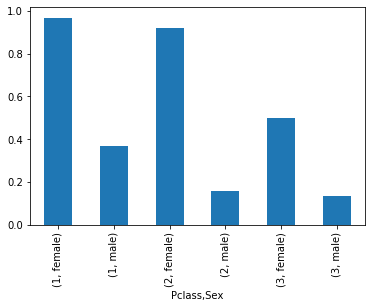

In [24]:
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar');

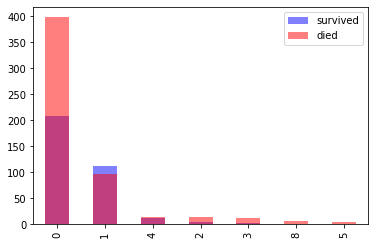

In [25]:
df.SibSp[survived].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'survived', color = 'blue')
df.SibSp[died].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'died', color='red')
plt.legend();

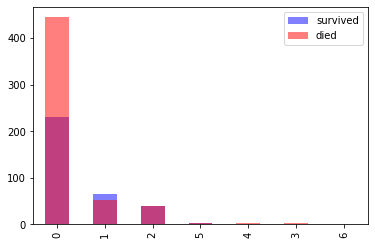

In [26]:
df.Parch[survived].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'survived', color = 'blue')
df.Parch[died].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'died', color='red')
plt.legend();

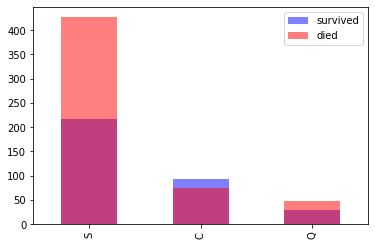

In [27]:
df.Embarked[survived].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'survived', color = 'blue')
df.Embarked[died].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'died', color='red')
plt.legend();